In [1]:
import qiskit as q
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from matplotlib import style
import math
style.use("dark_background")
%matplotlib inline

qasm_sim = q.Aer.get_backend('qasm_simulator')
statevec_sim = q.Aer.get_backend("statevector_simulator")

In [25]:
c = q.QuantumCircuit(2, 2)
c.ry(math.pi*3/4, 0)
c.ry(math.pi/4, 1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0, 1], [0,1])
c.draw()

┌───────────┐┌─┐   
q_0: ┤ RY(3pi/4) ├┤M├───
     └┬──────────┤└╥┘┌─┐
q_1: ─┤ RY(pi/4) ├─╫─┤M├
      └──────────┘ ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1

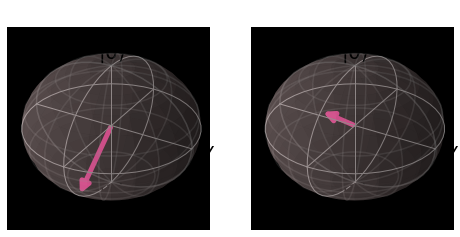

In [26]:
plot_bloch_multivector(orig_statevec)

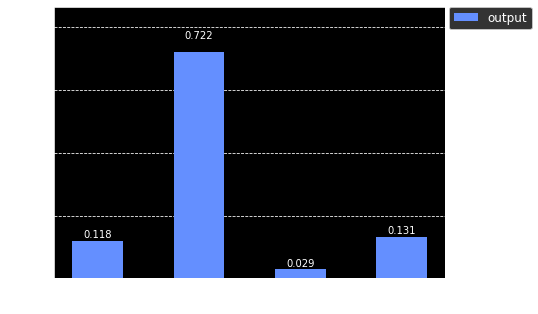

In [27]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

## Hadamards in front of uncertain qubits

In [5]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤ RY(pi/4) ├┤M├───
     ├───┤├──────────┤└╥┘┌─┐
q_1: ┤ H ├┤ RY(pi/4) ├─╫─┤M├
     └───┘└──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       0  1

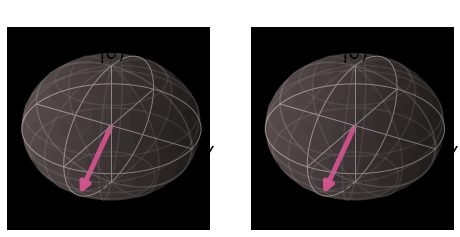

In [6]:
plot_bloch_multivector(statevec)

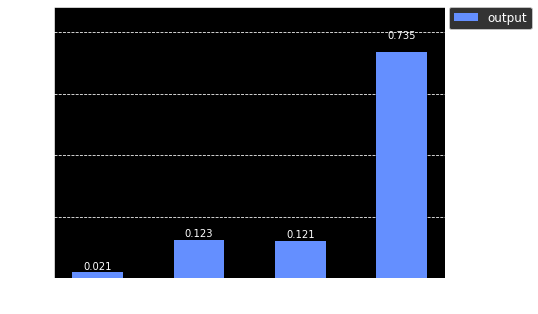

In [7]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

## Hadamard Sandwich of uncertain qubits!

In [8]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

┌───┐┌──────────┐┌───┐┌─┐   
q_0: ┤ H ├┤ RY(pi/4) ├┤ H ├┤M├───
     ├───┤├──────────┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ RY(pi/4) ├┤ H ├─╫─┤M├
     └───┘└──────────┘└───┘ ║ └╥┘
c: 2/═══════════════════════╩══╩═
                            0  1

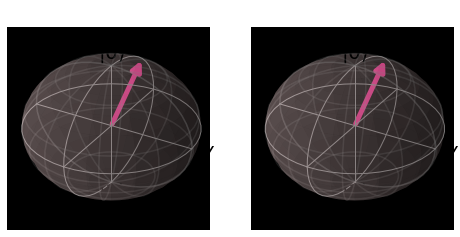

In [9]:
plot_bloch_multivector(statevec)

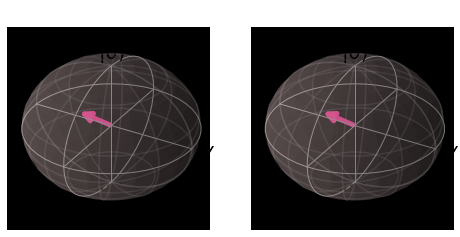

In [10]:
plot_bloch_multivector(orig_statevec)

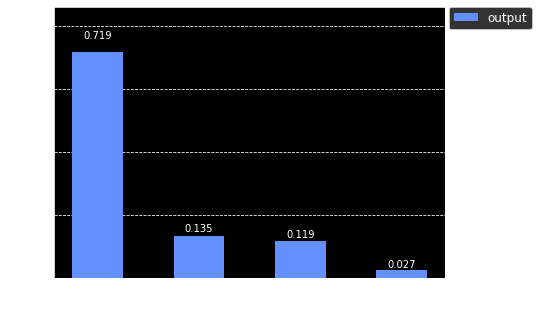

In [11]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

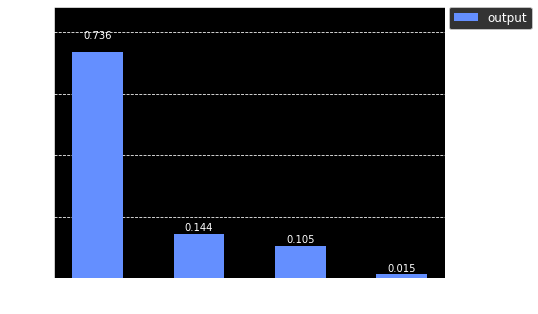

In [12]:
plot_histogram([orig_counts], legend=['output'])

## Original circuit w/ certain qubits

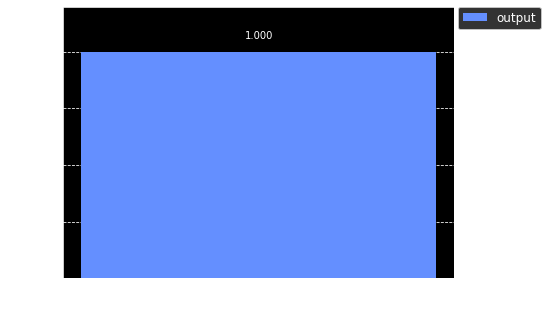

In [14]:
c = q.QuantumCircuit(2,2)
c.x(0)
c.x(1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

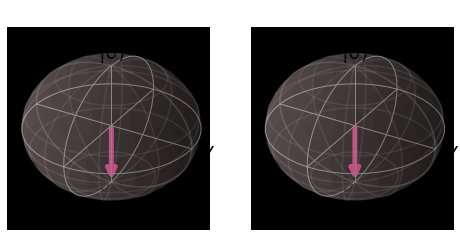

In [15]:
plot_bloch_multivector(orig_statevec)

## Hadamards in front of Certain Qubits

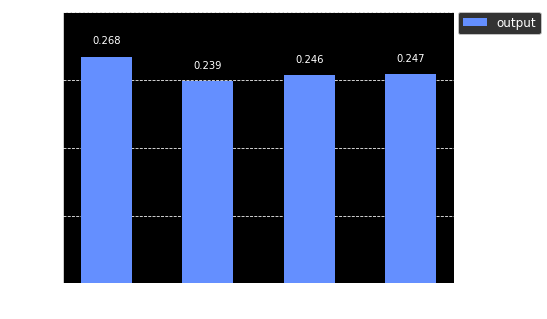

In [16]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

## Hadamard sandwich of certain qubits

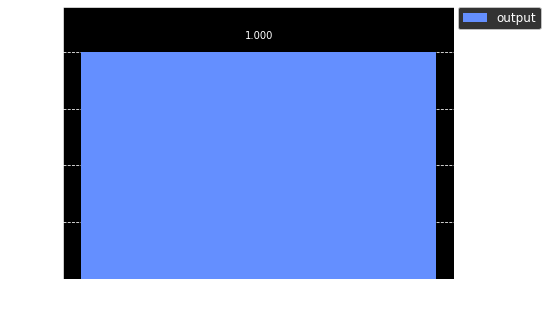

In [17]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

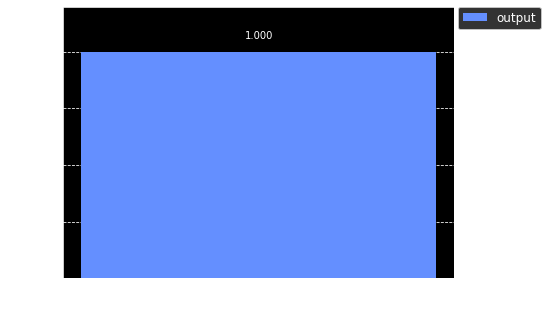

In [18]:
plot_histogram([orig_counts], legend=['output'])

In [28]:
def balanced_black_box(c):
    c.cx(0,2)
    c.cx(1,2)
    return c
    
def constant_black_box(c):
    # outputs whatever you put in. 
    return c

In [29]:
c = q.QuantumCircuit(3,2)
c = balanced_black_box(c)
c.draw()

q_0: ──■───────
       │       
q_1: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_2: ┤ X ├┤ X ├
     └───┘└───┘
c: 2/══════════

## Hadamard Sandwich

In [33]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c = balanced_black_box(c)
c.h(0)
c.h(1)
# no need for ending H on q[2]
c.draw()

┌───┐     ┌───┐     
q_0: ┤ H ├──■──┤ H ├─────
     ├───┤  │  └───┘┌───┐
q_1: ┤ H ├──┼────■──┤ H ├
     ├───┤┌─┴─┐┌─┴─┐└───┘
q_2: ┤ H ├┤ X ├┤ X ├─────
     └───┘└───┘└───┘     
c: 2/════════════════════

In [31]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
# no need for ending H on q[2]
c.draw()


┌───┐ ░            ░ ┌───┐
q_0: ┤ H ├─░───■────────░─┤ H ├
     ├───┤ ░   │        ░ ├───┤
q_1: ┤ H ├─░───┼────■───░─┤ H ├
     ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘
q_2: ┤ H ├─░─┤ X ├┤ X ├─░──────
     └───┘ ░ └───┘└───┘ ░      
c: 2/══════════════════════════

## Just Hadamard

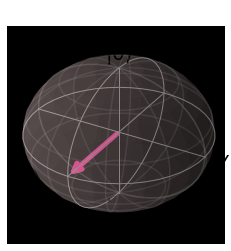

In [34]:
c = q.QuantumCircuit(1,1)
c.h(0)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

## Not gate then a Hadamard

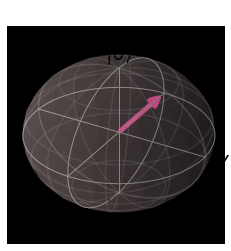

In [35]:
c = q.QuantumCircuit(1,1)
c.x(0)
c.h(0)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)


In [36]:
c = q.QuantumCircuit(3,2)
c.x(2)  # adding this not gate
c.barrier() # barrier for clarity
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
# no need for ending H on q[2]... even though it'd make the sandwich look better :(
c.draw()


░ ┌───┐ ░            ░ ┌───┐
q_0: ──────░─┤ H ├─░───■────────░─┤ H ├
           ░ ├───┤ ░   │        ░ ├───┤
q_1: ──────░─┤ H ├─░───┼────■───░─┤ H ├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘
q_2: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░──────
     └───┘ ░ └───┘ ░ └───┘└───┘ ░      
c: 2/══════════════════════════════════

In [37]:
c = q.QuantumCircuit(3,2)
c.x(2)  # adding this not gate
c.barrier() # barrier for clarity
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])
# no need for ending H on q[2]... even though it'd make the sandwich look better :(
c.draw()

░ ┌───┐ ░            ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░───■────────░─┤ H ├┤M├───
           ░ ├───┤ ░   │        ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░───┼────■───░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫─
     └───┘ ░ └───┘ ░ └───┘└───┘ ░       ║  ║ 
c: 2/═══════════════════════════════════╩══╩═
                                        0  1

## Balanced Counts

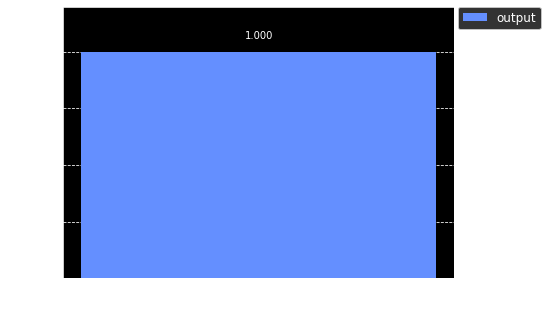

In [38]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

In [39]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c)  # changed to constant box.
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])
c.draw()

░ ┌───┐ ░  ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░──░─┤ H ├┤M├───
           ░ ├───┤ ░  ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░──░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░  ░ └───┘ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░──░───────╫──╫─
     └───┘ ░ └───┘ ░  ░       ║  ║ 
c: 2/═════════════════════════╩══╩═
                              0  1

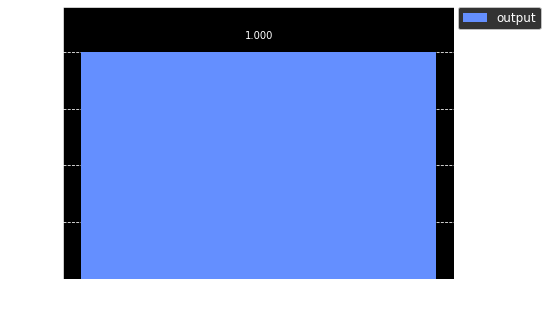

In [40]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

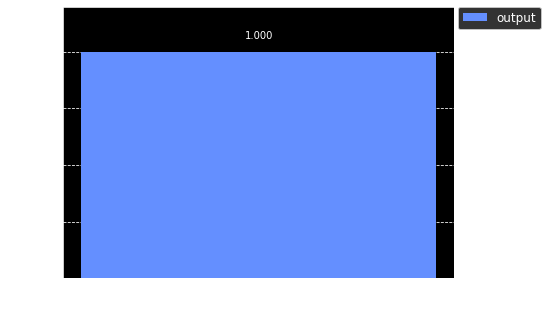

In [44]:
c = q.QuantumCircuit(3,2)

c.barrier()
c.ry(math.pi,2)  # changed c.x(2) to this.
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

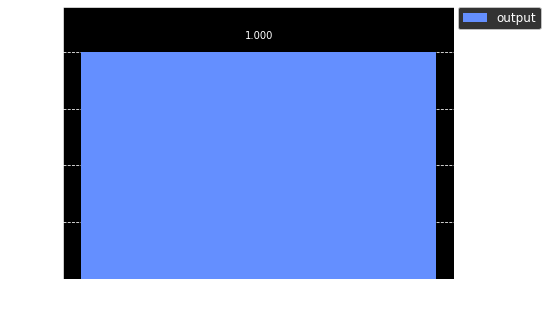

In [45]:
c = q.QuantumCircuit(3,2)
c.ry(math.pi,2)  # changed c.x(2) to this.
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

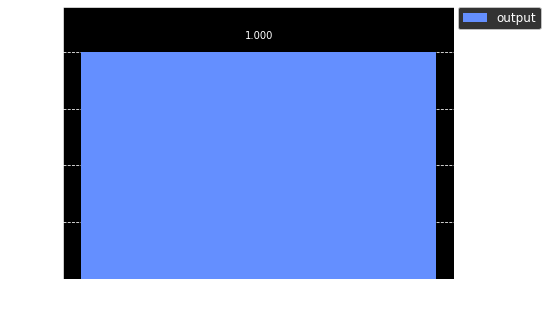

In [47]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.x(2)  # moving the not gate here
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

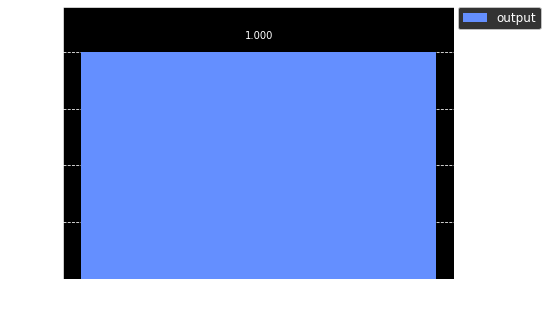

In [49]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.x(2)  # moved the not gate here
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

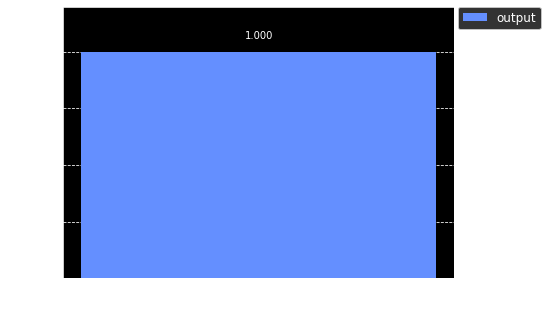

In [50]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.ry(math.pi,2)  # changed c.x(2) to this.
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

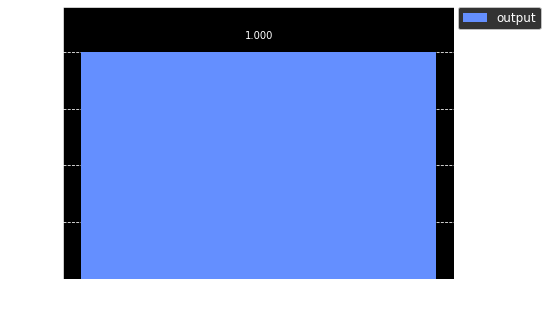

In [51]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.ry(math.pi,2)  # changed c.x(2) to this.
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])